<a href="https://colab.research.google.com/github/Geerford/data-science-ipynb/blob/master/Pandas/Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Подключение библиотек

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Подключение gdrive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd '/content/drive/My Drive/Colab Notebooks/Data Science/Pandas'

/content/drive/My Drive/Colab Notebooks/Data Science/Pandas


#Base

Создание датафрейма

In [ ]:
my_data = pd.DataFrame({
    'type': ['A', 'A', 'B', 'B'],
    'value': [10, 14, 12, 23]
})
my_data

,type,value
0,A,10
1,A,14
2,B,12
3,B,23


Тестовый датасет

In [ ]:
df = pd.read_csv('stat.csv')

Первые 10 строк и только 1 и 3 колонку.

In [ ]:
df.iloc[:10, [0, 2]]

,V1,V3
0,2,B
1,-1,B
2,0,A
3,2,A
4,0,B
5,2,A
6,0,A
7,1,A
8,0,B
9,-1,A


Все строки кроме 1 и 5 и только 2 и 4 колонку.

In [ ]:
df.drop([0, 4]).iloc[:, [1, 3]]

,V2,V4
1,7.0,1.0
2,11.0,0.0
3,11.0,2.0
5,11.0,0.0
6,9.0,2.0
...,...,...
495,8.0,-1.0
496,8.0,1.0
497,11.0,2.0
498,11.0,2.0


Наблюдения, у которых значения переменной V1  строго больше 0, и значение переменной V3  равняется 'A'



In [ ]:
df.query("V1 > 0 & V3 == 'A'")

,V1,V2,V3,V4
3,2,11.0,A,2.0
5,2,11.0,A,0.0
7,1,9.0,A,1.0
10,1,10.0,A,1.0
13,1,12.0,A,3.0
...,...,...,...,...
491,4,7.0,A,2.0
494,1,11.0,A,1.0
495,1,8.0,A,-1.0
496,3,8.0,A,1.0


Наблюдения, у которых значения переменной V2  не равняются 10, или значения переменной V4 больше или равно 1

In [ ]:
df.query("V2 != 10 | V4 >= 1")

,V1,V2,V3,V4
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
5,2,11.0,A,0.0
...,...,...,...,...
495,1,8.0,A,-1.0
496,3,8.0,A,1.0
497,-1,11.0,B,2.0
498,1,11.0,A,2.0


Добавление V5 - сумма V1 и V4.

Добавление V6 - логарифм V2

In [ ]:
df['V5'] = df['V1'] + df['V4']
df['V6'] = np.log(df['V2'])
df.head()

,V1,V2,V3,V4,V5,V6
0,2,13.0,B,1.0,3.0,2.564949
1,-1,7.0,B,1.0,0.0,1.945910
2,0,11.0,A,0.0,0.0,2.397895
3,2,11.0,A,2.0,4.0,2.397895
4,0,10.0,B,-1.0,-1.0,2.302585


Пропущенные значения → 0

In [ ]:
df['V1'] = [i if not np.isnan(i) else 0 for i in df['V1']]

Отрицательные значения → медианное значение переменной V4 (без учета отрицательных значений)

In [ ]:
df['V4'] = [i if i > 0 else pd.DataFrame([j for j in df['V4'] if j >= 0]).median()[0] for i in df['V4']]

Группировка и агрегация

In [ ]:
df.groupby('V3', as_index=False).agg({'V1': 'mean'}) \
    .rename(columns={'V1': 'mean'})

,V3,mean
0,A,0.164659
1,B,0.027888


#Фильмы

In [ ]:
movies = pd.read_csv('movies.csv')[['movie_title', 'budget', 'duration']]
movies.head()

,movie_title,budget,duration
0,Avatar,237000000.0,178.0
1,Pirates of the Caribbean: At World's End,300000000.0,169.0
2,Spectre,245000000.0,148.0
3,The Dark Knight Rises,250000000.0,164.0
4,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN


Применяет функцию к каждой ячейке

In [ ]:
movies[['budget', 'duration']] = movies[['budget', 'duration']].applymap(lambda x: x + 1)
movies.head()

,movie_title,budget,duration
0,Avatar,237000001.0,179.0
1,Pirates of the Caribbean: At World's End,300000001.0,170.0
2,Spectre,245000001.0,149.0
3,The Dark Knight Rises,250000001.0,165.0
4,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN


Применяет функцию по колонкам (axis=0, default) или построчно (axis=1)

In [ ]:
movies[['budget', 'duration']].apply(np.mean, axis=0)

budget      3.975262e+07
duration    1.082011e+02
dtype: float64

Наиболее быстрый способ

In [ ]:
movies.mean()

budget      3.975262e+07
duration    1.072011e+02
dtype: float64

#Успеваемость студентов

In [ ]:
data = pd.read_csv('students_performance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Доля учеников с бесплатными обедами

In [ ]:
data.loc[data.lunch == 'free/reduced', 'lunch'].count() / data.loc[:, 'lunch'].count()

0.355

Средняя успеваемость учеников с бесплатными обедами

In [ ]:
data.loc[data.lunch == 'free/reduced', ["math score", "reading score", "writing score"]].mean()

math score       58.921127
reading score    64.653521
writing score    63.022535
dtype: float64

Дисперсия успеваемости учеников с бесплатными обедами

In [ ]:
data.loc[data.lunch != 'free/reduced', ["math score", "reading score", "writing score"]].var()

math score       186.418089
reading score    191.285560
writing score    205.620887
dtype: float64

Логорифмирование столбца

In [ ]:
np.log(data['reading score'])

0      4.276666
1      4.499810
2      4.553877
3      4.043051
4      4.356709
         ...   
995    4.595120
996    4.007333
997    4.262680
998    4.356709
999    4.454347
Name: reading score, Length: 1000, dtype: float64

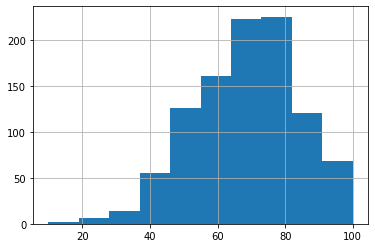

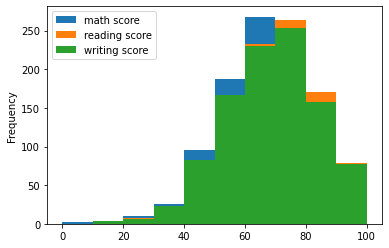

In [ ]:
data['writing score'].hist()
data.plot.hist()

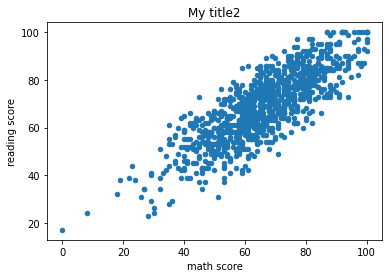

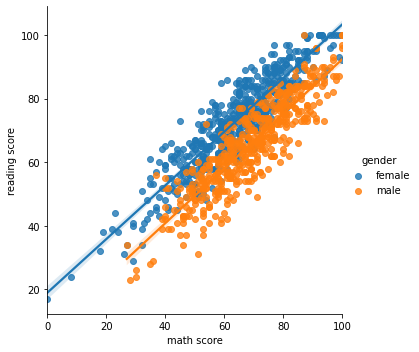

In [ ]:
data.plot.scatter(x='math score', y='reading score')
sns.lmplot(x='math score', y='reading score', hue='gender', data=data)

#Герои Warcraft Dota

In [ ]:
data = pd.read_csv('dota_hero_stats.csv', index_col=0)
data.head()

,attack_type,id,legs,localized_name,name,primary_attr,roles
0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


Группировка по количеству ног героя

In [ ]:
data.groupby('legs').aggregate({'id': 'count'}).rename(columns={'id': 'count'})

,count
legs,
0,11
2,95
4,7
6,3
8,1


Двойная группировка: по типу атаки и по атрибуту героя

In [ ]:
data.groupby(['attack_type', 'primary_attr']).count()

id  legs  localized_name  name  roles
attack_type primary_attr                                       
Melee       agi           19    19              19    19     19
            int            2     2               2     2      2
            str           35    35              35    35     35
Ranged      agi           18    18              18    18     18
            int           40    40              40    40     40
            str            3     3               3     3      3

Количество ролей героя

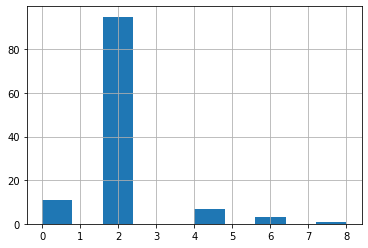

In [ ]:
data['role_count'] = [len(r.split(',')) for r in data.roles]
data.legs.hist()

Способ получения первых 10 элементов

In [ ]:
data.loc[:9] # если индекс представляет собой последовательность чисел от 0 с шагом 1
data.head(10)
data.iloc[0:10]
data.iloc[:10]

,attack_type,id,legs,localized_name,name,primary_attr,roles,role_count
0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']",3
1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']",4
2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']",4
3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini...",5
4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']",4
5,Ranged,6,2,Drow Ranger,npc_dota_hero_drow_ranger,agi,"['Carry', 'Disabler', 'Pusher']",3
6,Melee,7,2,Earthshaker,npc_dota_hero_earthshaker,str,"['Support', 'Initiator', 'Disabler', 'Nuker']",4
7,Melee,8,2,Juggernaut,npc_dota_hero_juggernaut,agi,"['Carry', 'Pusher', 'Escape']",3
8,Ranged,9,2,Mirana,npc_dota_hero_mirana,agi,"['Carry', 'Support', 'Escape', 'Nuker', 'Disab...",5
9,Ranged,10,0,Morphling,npc_dota_hero_morphling,agi,"['Carry', 'Escape', 'Durable', 'Nuker', 'Disab...",5


#Водоросли

In [ ]:
concentrations = pd.read_csv('algae.csv')
concentrations.head()

,species,genus,group,sucrose,alanin,citrate,glucose,oleic_acid
0,Fucus_vesiculosus,Fucus,brown,3.001472,3.711498,5.004262,2.548459,6.405165
1,Saccharina_japonica,Saccharina,brown,6.731070,1.255251,5.621499,6.013219,4.156700
2,Fucus_serratus,Fucus,brown,3.276870,0.346431,1.216767,3.623225,0.304573
3,Fucus_distichus,Fucus,brown,6.786996,6.641303,6.423606,2.272724,3.393203
4,Cladophora_fracta,Cladophora,green,3.861470,1.648450,6.940588,2.316955,2.528886


Средняя концентрация каждого вещества и каждого рода (**genus**)

In [ ]:
mean_concentrations = concentrations.groupby('genus')\
      .aggregate({'sucrose': 'mean', 
                  'alanin': 'mean', 
                  'citrate': 'mean', 
                  'glucose': 'mean', 
                  'oleic_acid': 'mean'})
mean_concentrations

,sucrose,alanin,citrate,glucose,oleic_acid
genus,,,,,
Ascophyllum,6.825467,0.875429,5.253527,3.414961,2.432526
Cladophora,4.008792,3.997055,5.288311,2.800276,2.263472
Fucus,4.355112,3.566411,4.214878,2.814803,3.367647
Palmaria,0.704580,3.176440,5.573905,3.242090,2.245538
Saccharina,4.183596,3.524207,3.346710,4.980594,4.487252


Концентрации **alanin** среди видов рода **Fucus**

In [ ]:
concentrations.loc[:, ['genus', 'alanin']].groupby('genus', as_index=False) \
    .filter(lambda x: (x['genus'] == 'Fucus').any()) \
    .agg({'min', 'mean', 'max'})

,genus,alanin
max,Fucus,6.641303
min,Fucus,0.346431
mean,NaN,3.566411


Дисперсия **citrate**, количество групп и размах sucrose

In [ ]:
concentrations.groupby('group').agg({'citrate': 'var', 'group': 'count', 'sucrose': lambda x: max(x) - min(x)}) \
    .rename({'citrate': 'citrate_var', 'group': 'group_count', 'sucrose': 'sucrose_range'}, axis=1)

,citrate_var,group_count,sucrose_range
group,,,
brown,5.468942,6,5.189345
green,3.950113,3,3.259662
red,NaN,1,0.000000


#Способы отрисовки

In [ ]:
df = pd.read_csv('income.csv')
df.head()

Идентичные способы отрисовки

In [ ]:
df.plot()
df.plot(kind='line')
df['income'].plot()
df.income.plot()
plt.plot(df.index, df.income)
sns.lineplot(x=df.index, y=df.income)
sns.lineplot(data=df)

#Геномные расстояния между видами

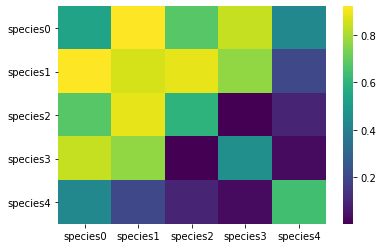

In [ ]:
data = pd.read_csv('genome_matrix.csv', index_col=0)
g = sns.heatmap(data=data, cmap='viridis')
g.yaxis.set_tick_params(rotation=360)

#Ирисы

Распределения без разделения на вид

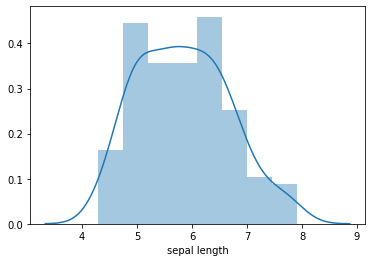

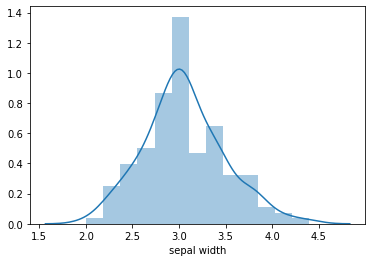

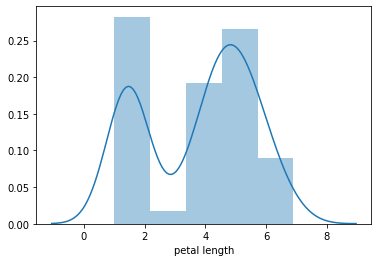

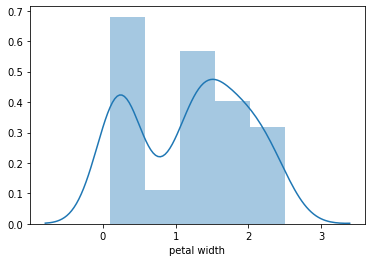

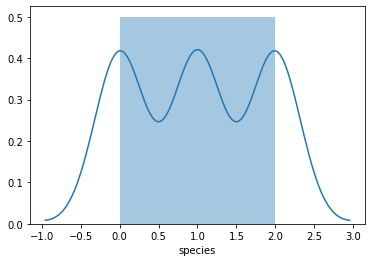

In [5]:
data = pd.read_csv('iris.csv', index_col=0)
for column in data:
    ax = sns.distplot(data[column])
    plt.show()

Скрипичная диаграмма. Распределение длины лепестков ирисов (**petal length**)

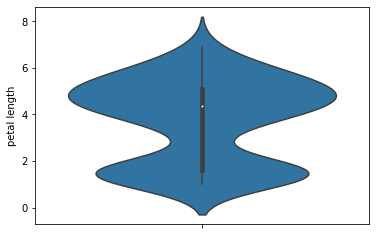

In [6]:
sns.violinplot(y='petal length', data=data)

Зависимость пар переменных друг от друга и распределение каждой переменной. 

Пара **petal width** и **petal length** имеет наибольшую корреляцию

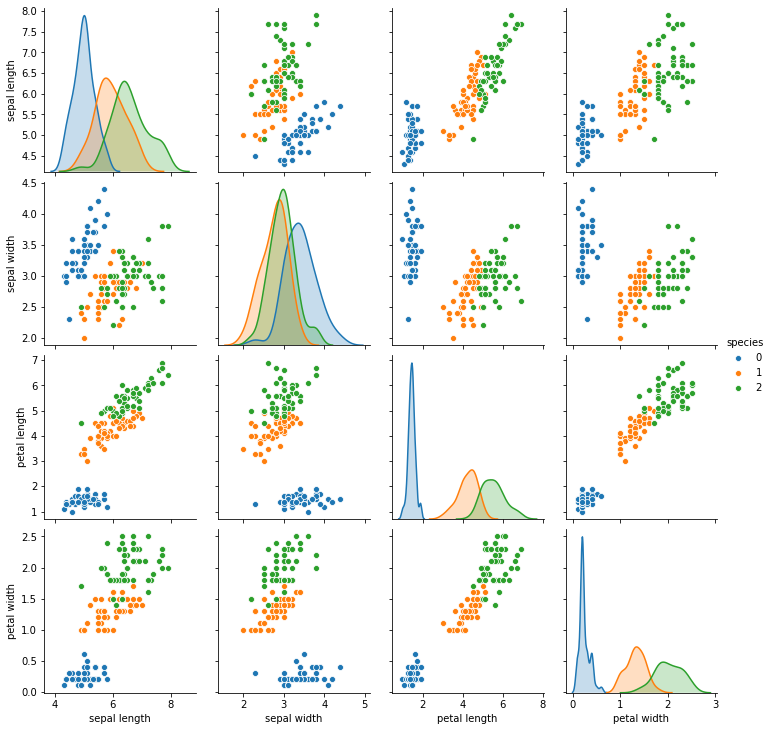

In [7]:
sns.pairplot(data, hue="species")

#Amazon. TimeSeries

In [ ]:
stock = pd.read_csv('amzn_stock.csv', index_col='Date', parse_dates=True)
stock.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829


Индексация по частичной дате

In [ ]:
stock['2010']

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829
...,...,...,...,...,...
2010-12-27,181.90,183.14,180.45,182.14,2249734
2010-12-28,182.10,182.77,181.05,181.09,1975718
2010-12-29,181.80,184.35,180.41,183.37,3122379


In [ ]:
stock['2010-02':'2011-03']

,Open,High,Low,Close,Volume
Date,,,,,
2010-02-01,123.18,124.86,113.82,118.87,37774317
2010-02-02,118.79,118.98,114.40,118.12,23084986
2010-02-03,117.12,119.61,116.56,119.10,12409012
2010-02-04,118.64,120.33,115.74,115.94,12783912
2010-02-05,115.88,117.65,114.10,117.39,11027086
...,...,...,...,...,...
2011-03-25,171.64,173.49,170.30,170.98,4294302
2011-03-28,171.80,172.50,169.25,169.35,3400936
2011-03-29,170.73,174.84,170.07,174.62,4887443


Resample позволяет увеличить или уменьшить масштаб в датасете

In [ ]:
stock.resample('2h').asfreq()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04 00:00:00,136.25,136.61,133.14,133.90,7600543.0
2010-01-04 02:00:00,NaN,NaN,NaN,NaN,NaN
2010-01-04 04:00:00,NaN,NaN,NaN,NaN,NaN
2010-01-04 06:00:00,NaN,NaN,NaN,NaN,NaN
2010-01-04 08:00:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2017-07-16 16:00:00,NaN,NaN,NaN,NaN,NaN
2017-07-16 18:00:00,NaN,NaN,NaN,NaN,NaN
2017-07-16 20:00:00,NaN,NaN,NaN,NaN,NaN


In [ ]:
stock.resample('1w').mean()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-10,133.3700,134.564,130.8860,132.872,8900385.80
2010-01-17,129.5660,130.472,126.9940,128.252,10756782.40
2010-01-24,126.5475,128.255,123.7925,125.360,9883903.25
2010-01-31,123.5780,125.528,120.5840,122.796,18627194.20
2010-02-07,118.7220,120.286,114.9240,117.884,19415862.60
...,...,...,...,...,...
2017-06-25,1003.6940,1007.236,993.9580,999.006,3435057.40
2017-07-02,987.3720,994.062,974.0140,981.004,3719885.20
2017-07-09,967.1325,976.000,958.6025,967.240,3116265.75


Метод скользящего окна. Используются для сглаживания кривых. В данном случае размер окна = 3 и каждый элемент в колонке использует два значения выше и текущее значение.

Минимальный период для применения. Для первого - его значение, для второго - значение первого и второго

In [ ]:
window_size = 3
period = 1
rolling = stock.rolling(window_size, min_periods=period).mean()
rolling

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.250000,136.610000,133.140000,133.900000,7.600543e+06
2010-01-05,134.840000,136.045000,132.475000,134.295000,8.228500e+06
2010-01-06,134.760000,135.606667,132.200000,133.613333,7.879325e+06
2010-01-07,133.346667,134.176667,130.753333,132.313333,9.022519e+06
2010-01-08,132.390000,133.576667,129.826667,131.923333,9.348310e+06
...,...,...,...,...,...
2017-07-11,982.516667,991.846667,978.786667,989.786667,3.057460e+06
2017-07-12,992.883333,1001.326667,988.440000,999.036667,3.379189e+06
2017-07-13,999.423333,1003.806667,992.573333,1000.423333,3.157356e+06


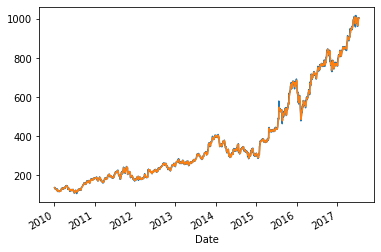

In [ ]:
stock.Open.plot()
rolling.Open.plot()

Окно каждый раз увеличивается

In [ ]:
expanding = stock.expanding().mean()
expanding

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.250000,136.610000,133.140000,133.900000,7.600543e+06
2010-01-05,134.840000,136.045000,132.475000,134.295000,8.228500e+06
2010-01-06,134.760000,135.606667,132.200000,133.613333,7.879325e+06
2010-01-07,134.072500,134.785000,131.350000,132.710000,8.667025e+06
2010-01-08,133.370000,134.564000,130.886000,132.872000,8.900386e+06
...,...,...,...,...,...
2017-07-11,376.749450,380.480122,372.654524,376.793171,4.534246e+06
2017-07-12,377.079033,380.811907,372.984923,377.125827,4.533757e+06
2017-07-13,377.410364,381.142460,373.313812,377.455026,4.532884e+06


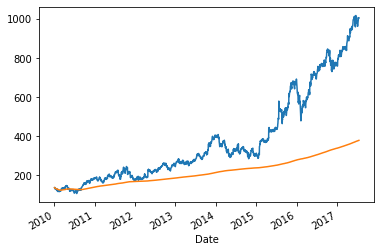

In [ ]:
stock.Open.plot()
expanding.Open.plot()

Экспотенциально-взвешенное окно. Аналогично expanding window, однако для расчета значения в ячейке предыдущие значения будут уменьшены на значения alpha

Alpha ∈ (0, 1). 1 - ближе к expanding, 0 - ближе к оригинальному

In [ ]:
ewm = stock.ewm(alpha=0.4).mean()
ewm

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.250000,136.610000,133.140000,133.900000,7.600543e+06
2010-01-05,134.487500,135.903750,132.308750,134.393750,8.385489e+06
2010-01-06,134.544898,135.304898,131.972653,133.300000,7.770942e+06
2010-01-07,133.379963,133.933162,130.514632,131.783456,9.268728e+06
2010-01-08,132.156870,133.823359,129.870708,132.536641,9.513827e+06
...,...,...,...,...,...
2017-07-11,982.556969,990.620311,976.360504,986.769160,3.158398e+06
2017-07-12,989.794181,997.792186,985.056302,994.665496,3.338468e+06
2017-07-13,995.724509,1001.427312,989.393781,997.051297,3.155389e+06


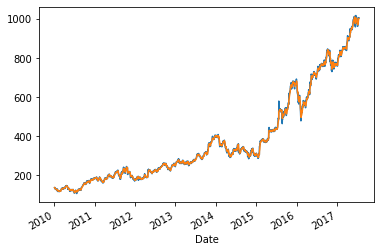

In [ ]:
stock.Open.plot()
ewm.Open.plot()